# **Regresión no lineal**

**1.** Se importa la base de datos "*A1.6 Tiempo de Entrega.csv*" con la función `read_csv()` de la librería *pandas*. Debido a que solamente hay dos variables: **"Tiempo"** y **"Calificacion"**, se declaran **x** e **y** como cada una de las columnas.

Posteriormente, utilizando la librería `matplotlib.pyplot`, se genera una **gráfica de dispersión** para observar el comportamiento de los datos de manera visual.



La base de datos contenía algunos elementos **"raros"**. En la columna de calificaciones, algunas entradas eran **caracteres**, cuando deberían ser números y otras tenían el término **NA** la cuál se leía como str al momento de intentar hacer la gráfica. Para resolver esto, se utilizó la función `to_numeric()` con el parámetro `errors = "coerce"` para convertir este tipo de entradas a **tipo NaN** y posteriormente **eliminarlas** con el comando `dropna()` ya que no tienen información que sirva para el análisis de los datos.

Adicionalmente, se encontraron **valores atípicos** en la columna de Tiempo. En uno, el tiempo era de **5000 horas**, lo cual no tenía sentido ya que eso significaría que el alumno entrego la actividad con aproximadamente 200 días de anticipación, es decir 2 semestres antes. Es por esto que se **excluyeron valores arriba de 336**, lo que equivale a 2 semanas. Otro valor era **negativo**, lo cual podría significar una entrega tardía, sin embargo, una entrega tardía no sería útil para el propósito del análisis por lo cual **se eliminaron datos con Tiempo menor a 0**.

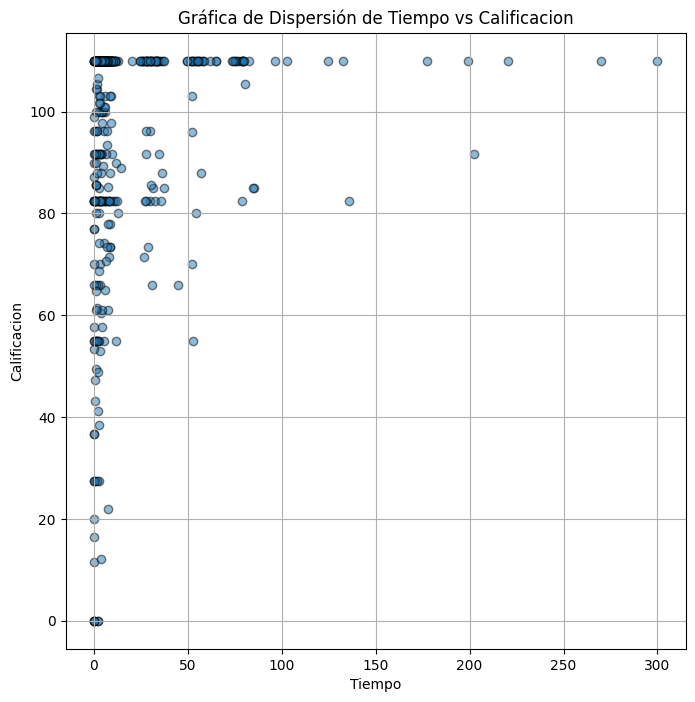

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("A1.6 Tiempo de Entrega.csv")
x = "Tiempo"
y = "Calificacion"

df[x] = pd.to_numeric(df[x],errors='coerce')
df[y] = pd.to_numeric(df[y],errors='coerce')
df = df.dropna()

df = df[df[x] <= 336]
df = df[df[x] >= 0]
plt.figure(figsize=(8,8))
plt.scatter(df[x],df[y], alpha=0.5, edgecolors="k")

plt.xlabel(x)
plt.ylabel(y)
plt.title("Gráfica de Dispersión de {} vs {}".format(x,y))

plt.grid(True)
plt.show()

En este momento, tras observar la gráfica, mi predicción es que el algoritmo más adecuado para un modelo de regresión que se ajuste a los datos, será una **regresión KNN**. Debido a que los datos están altamente dispersos.

**2.** A continuación se separa el modelo en proporción **70/30** donde **70% es para entrenamiento** y **30% para validación**. Se importa la función `train_test_split()` de la librería `sklearn.model_selection`.

Una vez realizada la separación, se calcula el **promedio** de cada una de las variables en entrenamiento y test con la función `mean()`. Se imprimen los promedios obtenidos.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(df[x],df[y], test_size = 0.3, random_state = 23)

time_tr_avg = x_train.mean()
time_te_avg = x_test.mean()
grade_tr_avg = y_train.mean()
grade_te_avg = y_test.mean()

print(f"Training Set {x} Average: {time_tr_avg}")
print(f"Test Set {x} Average: {time_te_avg}")
print("")
print(f"Training Set {y} Average: {grade_tr_avg}")
print(f"Test Set {y} Average: {grade_te_avg}")

Training Set Tiempo Average: 18.028001491312082
Test Set Tiempo Average: 17.46077256940625

Training Set Calificacion Average: 95.40187429530201
Test Set Calificacion Average: 93.959764375


Existe una **diferencia**, aunque mínima, en los promedios de ambos Tiempo y Calificación. Esta varianza podría afectar el análisis **sobreestimando el efecto de las variables** al momento de realizar un modelo, ya que **el promedio de los datos de entrenamiento es más alto que el de los de prueba**. Aún así, en ambas casos es **coherente**, es decir, que e**l promedio es menor para ambos Tiempo y Calificación**, por lo cual el **efecto es aún menor**.

**3.** Primero se probará un **modelo de regresión polinomial**. Para esto se importa la función `PolynomialFeatures()` de la librería `sklearn.preprocessing` y se importa también la librería `statsmodels.api`.

Se **modifican los datos** para adaptarse a un modelo polinomial utilizando las funciones a`rray.reshape(-1,1)` y se establece el parámetro `degree = 4`. Apartir de estos datos modificados se crean **2 dataframes nuevos** sobre los cuales se creará el modelo.

Utilizando la función `OLS()` de `statsmodels.api` se entrena el modelo con el comando `.fit()` y se imprime un resumen de este. Se utiliza este modelo con los datos de validación para observar los resultados usando el comando `predict()`.

De igual manera utilizando la librería `matplotlib.pyplot` se genera una gráfica de dispersión donde se muestran ambos valores reales de **"Calificacion"** sobre **"Tiempo"** y los **valores estimados** de "Calificacion" utilizando el modelo.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     7.418
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.05e-05
Time:                        02:27:10   Log-Likelihood:                -1356.1
No. Observations:                 298   AIC:                             2722.
Df Residuals:                     293   BIC:                             2741.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             87.0898      2.058     42.319      0.0

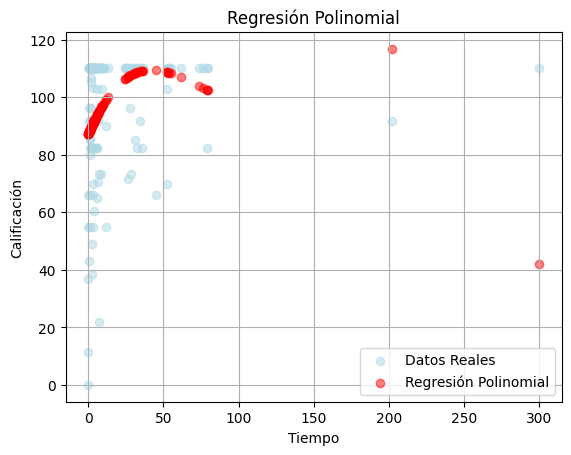

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

x_tmp_train = x_train.array.reshape(-1,1)
x_tmp_test = x_test.array.reshape(-1,1)
polyq_train = PolynomialFeatures(degree=4).fit(x_tmp_train)
polyq_test = PolynomialFeatures(degree=4).fit(x_tmp_test)
xq_train = pd.DataFrame(polyq_train.transform(x_tmp_train))
xq_test = pd.DataFrame(polyq_test.transform(x_tmp_test))
mq = sm.OLS(list(y_train),xq_train).fit()
print(mq.summary())
plt.scatter(x_test,y_test, color="lightblue",alpha = 0.5,label="Datos Reales")
yhat_mq = mq.predict(xq_test)
plt.scatter(x_test,yhat_mq, color = "red",alpha = 0.5, label="Regresión Polinomial")
plt.xlabel("Tiempo")
plt.ylabel("Calificación")
plt.title("Regresión Polinomial")
plt.legend()
plt.grid(True)
plt.show()

Con el modelo de **regresión polinomial** paraece haber una **relación positiva** en donde a menor tiempo menor calificación aunque **no es muy clara**. Además, esta relación solo es verdadera hasta las 40 horas aproximadamente y después la calificación disminuye conforme al tiempo en **una relación negativa**. Esto significaría que **la variable no es significativamente asociada a las calificaciones**, sin embargo el modelo no se adapta bien a los datos ya que solo tiene un **R^2 ajustada de 0.08** lo cual es **muy bajo** y por lo tanto **las predicciones no son confiables**.

**4.** A continuación, se probará un **modelo de regresión segmentada**. Para esto se importa la función `PiecewiseRegressor()` de la librería `mlinsight.mlmodel`.

Se utilizan los datos **modificados previamente** y se entrena el modelo con la función `PiecewiseRegressor()` usando el parámetro `'bins'`.

Se utiliza este modelo con los datos de validación para observar los resultados usando el comando `predict()`.

De igual manera utilizando la librería `matplotlib.pyplot` se genera una gráfica de dispersión donde se muestran ambos valores reales de **"Calificacion"** sobre **"Tiempo"** y los **valores estimados** de "Calificacion" utilizando el **modelo de regresión segmentada**.

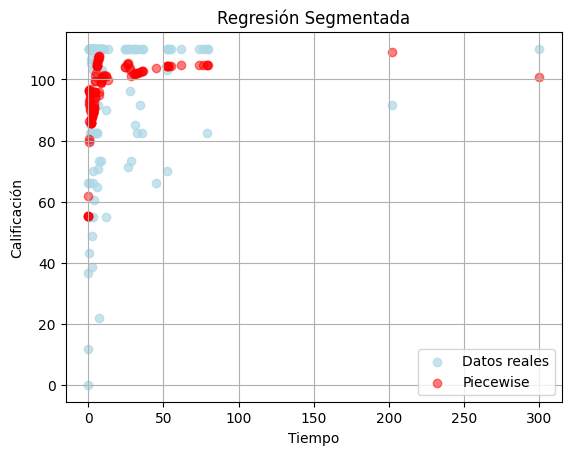

In [ ]:
from mlinsights.mlmodel import PiecewiseRegressor

ms = PiecewiseRegressor('bins').fit(xq_train.iloc[:,1:],y_train)
yhat_ms = ms.predict(xq_test.iloc[:,1:])

plt.scatter(x_test,y_test,color = "lightblue",alpha=0.7,label="Datos reales")
plt.scatter(x_test,yhat_ms,color="red",alpha=0.5,label="Piecewise")
plt.xlabel("Tiempo")
plt.ylabel("Calificación")
plt.title("Regresión Segmentada")
plt.legend()
plt.grid(True)
plt.show()

**5.** A continuación, se probará un **modelo de regresión KNN**. Para esto se importa la función `KNeighborsRegressor()` de la librería `sklearn.neighbors`.

Se utilizan los datos **modificados previamente** y se entrena el modelo con la función `KNeighborsRegresor()` usando el parámetro `k = 10` y el comando `.fit()`.

Se utiliza este modelo con los datos de validación para observar los resultados usando el comando `predict()`.

De igual manera utilizando la librería `matplotlib.pyplot` se genera una gráfica de dispersión donde se muestran ambos valores reales de **"Calificacion"** sobre **"Tiempo"** y los **valores estimados** de "Calificacion" utilizando el **modelo de regresión KNN**.

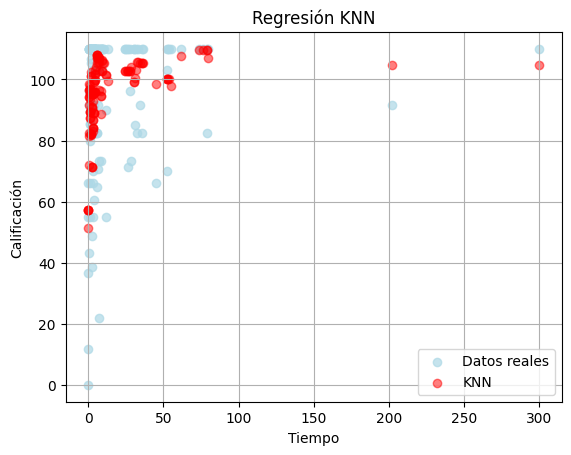

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as knn
k = 10
mk = knn(k).fit(x_tmp_train,y_train)

yhat_mk = mk.predict(x_tmp_test)
plt.scatter(x_test,y_test,color = "lightblue",alpha=0.7,label="Datos reales")
plt.scatter(x_test,yhat_mk,color="red",alpha=0.5,label="KNN")
plt.xlabel("Tiempo")
plt.ylabel("Calificación")
plt.title("Regresión KNN")
plt.legend()
plt.grid(True)
plt.show()

**6.** Para **evaluar y comparar el desempeño de los 3 modelos** se calcula el **RSE** de cada uno. Para esto se importa la librería `numpy` para utilizar la función `sqrt()` y se **calcula el error cuadrado residual** para cada modelo respecto a sus predicciones y los valores reales.

In [ ]:
import numpy as np
# Polinomial
rss_mq = sum((list(y_test)-yhat_mq)**2)
rse_mq = np.sqrt(rss_mq/(len(y_test)-1))
print("RSE de Regresión Polinomial:",rse_mq)
# Segmentada
rss_ms = sum((list(y_test)-yhat_ms)**2)
rse_ms = np.sqrt(rss_ms/(len(y_test)-1))
print("RSE de Regresión Segmentada:",rse_ms)
# KNN
rss_mk = sum((list(y_test)-yhat_mk)**2)
rse_mk = np.sqrt(rss_mk/(len(y_test)-1))
print("RSE de Regresión KNN:",rse_mk)

RSE de Regresión Polinomial: 23.463376663326972
RSE de Regresión Segmentada: 20.530675372908586
RSE de Regresión KNN: 20.749510436436008


Considerando los valores de **RSE** de cada modelo y también su **interpretabilidad**, **el modelo "ganador" sería el de regresión segmentada**, es el que **menor error** tiene y además es **más interpretable** que el modelo de regresión KNN. El modelo de regresión segmentada **se puede interpretar por gracias a que se explica por tramos**, mientras que el KNN no tiene una ecuación matemática clara. El modelo de regresión polinomial también tiene alta interpretabilidad, sin embargo, no se adapta igual de bien a los datos.

**7.** Por último, para observar el **desempeño de cada modelo** de manera visual y **compararlos**, se genera una **gráfica de dispersión** en donde se muestran las **calificaciones reales**, y las **calificaciones predichas** por cada uno de los 3 modelos diferentes.

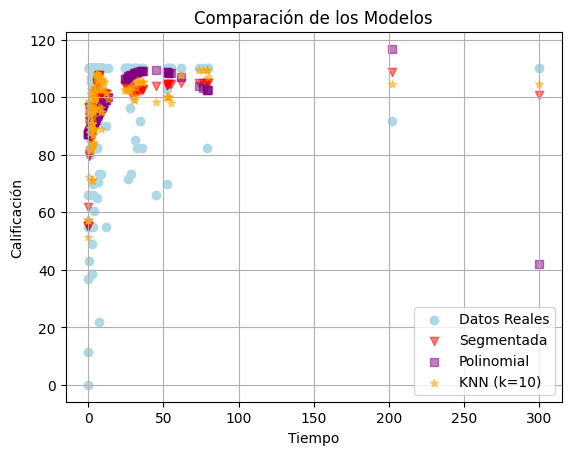

In [ ]:
plt.scatter(x_test,y_test,alpha=1,marker="o",label="Datos Reales",color="lightblue")
plt.scatter(x_test,yhat_ms,alpha=0.5,color="red",marker="v",label="Segmentada")
plt.scatter(x_test,yhat_mq,alpha=0.5,color="purple",marker="s",label="Polinomial")
plt.scatter(x_test,yhat_mk,alpha=0.5,color="orange",marker="*",label=f"KNN (k={k})")

plt.xlabel("Tiempo")
plt.ylabel("Calificación")
plt.title("Comparación de los Modelos")
plt.legend()
plt.grid(True)
plt.show()